In [14]:
# Import pandas and numpy
import pandas as pd
import numpy as np

#### 1. Working on VGchartz datasets

First, I will import video games datasets scraped from VGchartz. Then I will explore the data.

In [15]:
# Read csv
df = pd.read_csv('datasets/vgchartz_db_2019.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


#### 2. Filtering 8th gen video games

In this project, I will focus on 8th generation console games, which are games that is released after 2012. Thus, I will drop row with missing 'Year' since I won't be able to filter them.

Then, I will filter video games released in 2012 and onwards.

In [16]:
# Drop null in 'Year'
df.dropna(subset=['Year'],inplace=True)

#Convert 'Year' to int
df['Year'] = df.Year.astype('int64')

# Filter video games from eight gen i.e. Year is 2012 onwards
df = df[df.Year >= 2012]

# Strip whitespaces in text columns
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].str.strip()


df.sample(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
17326,17327,Downtown Nekketsu Koushinkyoku: Soreyuke Daiun...,Action,NaN,PS3,Arc System Works,Arc System Works,NaN,NaN,NaN,0.02,NaN,NaN,0.02,NaN,2015
8225,8226,Hitman: Absolution,Action,M,PC,Square Enix,IO Interactive,9.0,NaN,NaN,0.22,0.03,0.18,NaN,0.01,2012
45220,45221,SMART Adventures Mission Math,Misc,NaN,And,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
55344,55345,The Mummy Demastered,Action,NaN,XOne,WayForward Technologies,WayForward Technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
44,45,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Role-Playing,E,3DS,Nintendo,Game Freak,NaN,NaN,14.17,NaN,NaN,NaN,NaN,NaN,2014
4626,4627,Nuclear Throne,Shooter,NaN,PC,Unknown,Vlambeer,NaN,NaN,0.49,NaN,NaN,NaN,NaN,NaN,2017
36927,36928,Major League Wizardry,Misc,NaN,And,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
16794,16795,THE iDOLM@STER: Stella Stage,Misc,NaN,PS4,Namco Bandai Games,Namco Bandai Games,NaN,NaN,NaN,0.03,NaN,NaN,0.03,NaN,2017
50504,50505,Valiant Hearts: The Great War,Misc,NaN,PS4,Ubisoft,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
10343,10344,Symphony,Music,NaN,PC,Unknown,Empty Clip Studios,NaN,NaN,0.15,NaN,NaN,NaN,NaN,NaN,2015


#### 3. Filtering console games

Now, I will take a look at the platform names, then filter only console platform. In this case; PS4, XOne, NS.

In [17]:
# Explore Platfrom
print(df.Platform.unique())

# Filter only current gen consoles
console_games = df[df.Platform.isin(['PS4','XOne','NS'])]

display(console_games.sample(5))
print('Number of games: '+str(console_games.shape[0]))

['PC' 'PS3' 'PS4' '3DS' 'X360' 'NS' 'XOne' 'DS' 'WiiU' 'Wii' 'PSV' 'PSP'
 'GBA' 'PSN' 'XBL' 'Amig' 'SAT' 'PS2' 'And' 'OSX' 'Ouya' 'Mob' 'DSi'
 'Linux' 'PS' 'BRW' 'DSiW' 'WW' 'WinP' 'iOS' '2600' 'PCFX' 'Arc' 'GEN'
 'GC' 'GIZ' 'GB' 'Lynx' 'DC' 'SNES' 'VC' 'NES' 'iQue' 'MSD' 'MS' 'SCD'
 'ZXS' 'S32X' 'Int' 'CD32']


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
14460,14461,Hasbro Family Fun Pack Conquest Edition,Misc,NaN,XOne,Ubisoft,Ubisoft,NaN,NaN,NaN,0.06,0.05,NaN,NaN,0.01,2016
53132,53133,Bleed 2,Action,NaN,NS,Digerati,Bootdisk Revolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
12981,12982,Strange Brigade,Shooter,NaN,PS4,Rebellion Developments,Rebellion Developments,NaN,NaN,NaN,0.09,0.05,0.03,NaN,0.02,2018
18994,18995,Mega Man X Legacy Collection 2,Platform,NaN,NS,Capcom,Capcom,NaN,NaN,NaN,0.01,NaN,NaN,0.01,NaN,2018
5718,5719,Rayman Legends,Platform,E10,XOne,Ubisoft,Ubisoft Montpellier,NaN,NaN,NaN,0.38,0.13,0.22,NaN,0.03,2014


Number of games: 3736


We have 3736 games left after filtering.

Next, I will explore null values, especially missing 'Critic_Score'.

In [18]:
# Drop duplicated rows
console_games.drop_duplicates(inplace=True)

# Explore null values for score and sales
print('Counts of null values in each column')
print(console_games.isna().sum())

# Explore games without score
display(console_games[console_games.Critic_Score.isna()].head(5))

# So some games without score is multi-platform games

Counts of null values in each column
Rank                0
Name                0
Genre               0
ESRB_Rating      1877
Platform            0
Publisher           0
Developer           0
Critic_Score     3440
User_Score       3652
Total_Shipped    3681
Global_Sales     1990
NA_Sales         2334
PAL_Sales        2763
JP_Sales         3054
Other_Sales      2211
Year                0
dtype: int64


<ipython-input-18-adf9f367078d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  console_games.drop_duplicates(inplace=True)


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015
85,86,"Pokemon: Let's Go, Pikachu/Eevee",Role-Playing,E,NS,Nintendo,Game Freak,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,2018
97,98,Call of Duty: Black Ops IIII,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,9.32,4.05,3.28,0.50,1.49,2018
100,101,FIFA 19,Sports,E,PS4,Electronic Arts,EA Sports,NaN,NaN,NaN,9.15,0.84,6.87,0.10,1.34,2018
112,113,Call of Duty: Infinite Warfare,Shooter,M,PS4,Activision,Infinity Ward,NaN,NaN,NaN,8.48,3.11,3.83,0.19,1.36,2016


#### 4. Importing datasets from Metacritics

It seems that there are too many missing score, which I assumed that it's the main factor that affect sales.

Therefore, I will have to use score data from Metacritics.

In [19]:
# Import metacritics datasets
meta_score = pd.read_csv('datasets/games_score_metacritic.csv')

meta_score.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


I will use video game names and platform to join the table, so I will have to replace the platform names in Metacritics to match VGchartz table.

In [20]:
# Strip whitespaces in name and platform
for col in ['name','platform']:
    meta_score[col] = meta_score[col].str.strip()

# Explore platforms
print(meta_score.platform.unique())

# Filter 8th gen console and replace console names
console_score = meta_score[meta_score.platform.isin(['PlayStation 4','Xbox One','Switch'])]
console_score['platform'].replace({'PlayStation 4':'PS4','Xbox One':'XOne','Switch':'NS'},inplace=True)

print(console_score.platform.unique())

['Nintendo 64' 'PlayStation' 'PlayStation 3' 'Dreamcast' 'Xbox 360' 'Wii'
 'Xbox One' 'PC' 'Switch' 'PlayStation 2' 'PlayStation 4' 'GameCube'
 'Xbox' 'Wii U' 'Game Boy Advance' '3DS' 'Xbox Series X' 'DS'
 'PlayStation Vita' 'PlayStation 5' 'PSP' 'Stadia']
['XOne' 'NS' 'PS4']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


There might be duplicated games with the same platform, so I will drop them.

I will also rescale the Metacritics score.

In [21]:
# Explore duplicated games
display(console_score[console_score.duplicated('name',keep=False)].tail(10))

# Drop duplicated games on same platform
console_score.drop_duplicates(['name','platform'],inplace=True)

# Rescale the meta_score
console_score.meta_score = console_score.meta_score.apply(lambda x: x/10,)

console_score

,name,platform,release_date,summary,meta_score,user_review
18282,Deadfall Adventures,NS,"November 15, 2013",Deadfall Adventures takes the classic adventur...,43,7.7
18290,Jeremy McGrath Supercross 2000,PS4,"September 29, 1999",Race as or against 11-time Supercross Champ Je...,43,8.0
18332,Prison Break: The Conspiracy,PS4,"March 30, 2010",Prison Break - The Conspiracy takes you inside...,42,4.2
18553,Agony,PS4,"May 29, 2018","Agony is a first-person, survival horror set i...",37,4.6
18575,Past Cure,PS4,"February 23, 2018",Past Cure is a dark psychological thriller tha...,37,4.7
18651,Past Cure,XOne,"February 23, 2018",Past Cure is a dark psychological thriller tha...,34,6.0
18653,Agony,XOne,"May 29, 2018","Agony is a first-person, survival horror set i...",34,4.3
18707,Ghostbusters,XOne,"July 12, 2016",Have you and your friends been experiencing pa...,32,3.8
18722,Ghostbusters,PS4,"July 12, 2016",Have you and your friends been experiencing pa...,30,1.4
18733,ARK: Survival Evolved,NS,"November 30, 2018","As a man or woman stranded naked, freezing and...",29,2.5


<ipython-input-21-86ae454f1677>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  console_score.drop_duplicates(['name','platform'],inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,platform,release_date,summary,meta_score,user_review
7,Red Dead Redemption 2,XOne,"October 26, 2018",Developed by the creators of Grand Theft Auto ...,9.7,8.0
8,Grand Theft Auto V,XOne,"November 18, 2014",Grand Theft Auto 5 melds storytelling and game...,9.7,7.9
13,The Legend of Zelda: Breath of the Wild,NS,"March 3, 2017",Forget everything you know about The Legend of...,9.7,8.7
16,Red Dead Redemption 2,PS4,"October 26, 2018",Developed by the creators of Grand Theft Auto ...,9.7,8.5
17,Grand Theft Auto V,PS4,"November 18, 2014",The sprawling sun-soaked metropolis of Los San...,9.7,8.4
...,...,...,...,...,...,...
18744,The Quiet Man,PS4,"November 1, 2018",The Quiet Man is an immersive story driven cin...,2.8,1.8
18754,Basement Crawl,PS4,"February 25, 2014","Enter the basement, explore dark, sinister are...",2.7,2.8
18761,Road Rage,PS4,"November 14, 2017","Road Rage is an over-the-top, knock-down-drag-...",2.6,2.4
18790,Fighter Within,XOne,"November 19, 2013",Unleash your inner fighter to beat your friend...,2.3,2.8


#### 5. Imputing video games sales

There are games with sales by each region but lacking total sales, also games with total sales but lacking each region.

In this step, I will impute missing sales in each region by filling them with zeros. Then I will sum the sales of each region to be the total sales if the total sales value is missing.

Games that has 0 sales will have to be dropped.

In [22]:
# Fill zeros for null values in sales
console_games[['NA_Sales','PAL_Sales','JP_Sales','Other_Sales']] = console_games[['NA_Sales','PAL_Sales','JP_Sales','Other_Sales']].fillna(0)

# Sum sales
console_games.Global_Sales[console_games.Global_Sales.isna()] = console_games[console_games.Global_Sales.isna()][['NA_Sales','PAL_Sales','JP_Sales','Other_Sales']].sum(axis=1)

# Drop Games with 0 sales
console_games = console_games[console_games.Global_Sales != 0]

console_games

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-22-bd910598c1ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  console_games.Global_Sales[console_games.Global_Sales.isna()] = console_games[console_games.Global_Sales.isna()][['NA_Sales','PAL_Sales','JP_Sales','Other_Sales']].sum(axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015
45,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,9.8,NaN,NaN,13.94,5.26,6.21,0.21,2.26,2018
50,51,Call of Duty: WWII,Shooter,M,PS4,Activision,Sledgehammer Games,8.0,NaN,NaN,13.40,4.67,6.21,0.40,2.12,2017
68,69,FIFA 18,Sports,E,PS4,EA Sports,EA Vancouver,8.3,NaN,NaN,11.80,1.27,8.64,0.15,1.73,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19824,19825,Happy Manager: Shiawase Zhuang no Kanrinin San,Simulation,NaN,PS4,D3 Publisher,D3 Publisher,NaN,NaN,NaN,0.01,0.00,0.00,0.01,0.00,2018
19840,19841,RPG Maker MV,Misc,E10,PS4,NIS America,Kadokawa Games,NaN,NaN,NaN,0.01,0.00,0.00,0.01,0.00,2019
19843,19844,World End Syndrome,Visual Novel,NaN,NS,Arc System Works,Arc System Works,NaN,NaN,NaN,0.01,0.00,0.00,0.01,0.00,2018
19845,19846,Super Meat Boy,Platform,NaN,PS4,Team Meat,Team Meat,NaN,NaN,NaN,0.01,0.00,0.00,0.00,0.00,2016


#### 6. Joining the two datasets

Now that I have already prepared data on both datasets, I will inner join them using name and platform.

In [23]:
# Join tables

console_score_merge = console_games.merge(console_score,how='inner',left_on = ['Name','Platform'],right_on=['name','platform'])

display(console_score_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 912
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           913 non-null    int64  
 1   Name           913 non-null    object 
 2   Genre          913 non-null    object 
 3   ESRB_Rating    757 non-null    object 
 4   Platform       913 non-null    object 
 5   Publisher      913 non-null    object 
 6   Developer      913 non-null    object 
 7   Critic_Score   189 non-null    float64
 8   User_Score     24 non-null     float64
 9   Total_Shipped  0 non-null      float64
 10  Global_Sales   913 non-null    float64
 11  NA_Sales       913 non-null    float64
 12  PAL_Sales      913 non-null    float64
 13  JP_Sales       913 non-null    float64
 14  Other_Sales    913 non-null    float64
 15  Year           913 non-null    int64  
 16  name           913 non-null    object 
 17  platform       913 non-null    object 
 18  release_da

None

The data type of user reviews is object, meaning that there's text in the column.

I will just find the text and replace them with 'NaN'

In [24]:
print(console_score_merge.user_review.sort_values()) 

console_score_merge.user_review = console_score_merge.user_review.replace({'tbd':np.nan}).dropna().astype('float64')

445    1.4
441    1.5
91     1.8
49     1.8
651    2.0
      ... 
105    9.2
841    9.6
719    tbd
750    tbd
704    tbd
Name: user_review, Length: 913, dtype: object


#### 7. Visualizing data

Now that the data is ready, I will visualize factors that might have an effect on Global Sales. Starting with Metacritics Score.

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

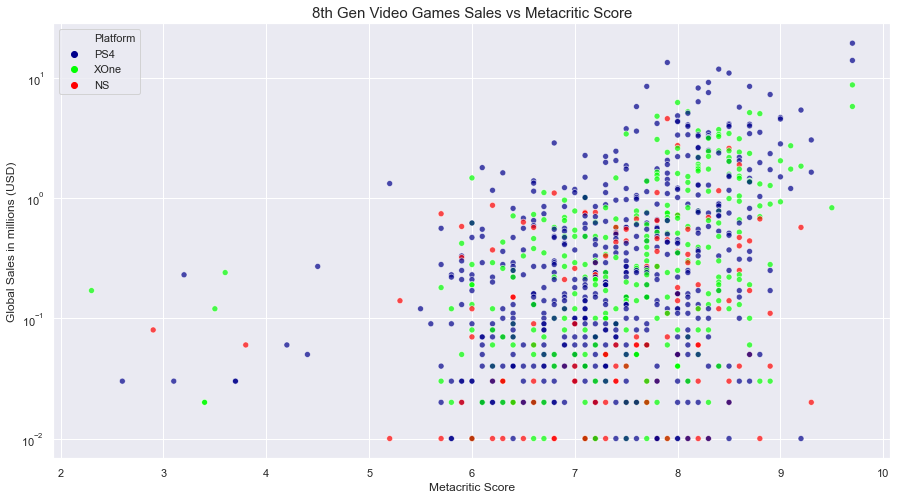

In [60]:
# Visualize Sales vs Meta Score
color = {'PS4':'darkblue','XOne':'lime','NS':'red'}
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.scatterplot(x='meta_score',y='Global_Sales',data=console_score_merge,hue='Platform',palette=color,alpha=0.7)
g.set_yscale('log')
plt.xlabel('Metacritic Score')
plt.ylabel('Global Sales in millions (USD)')
plt.title('8th Gen Video Games Sales vs Metacritic Score',fontsize=15)
plt.show()

As expected! There's some kind of log relationship between Sales and Metacritics score. Even there's many outliers, I will left it as it is for now.

Next I will explore user review and sales.

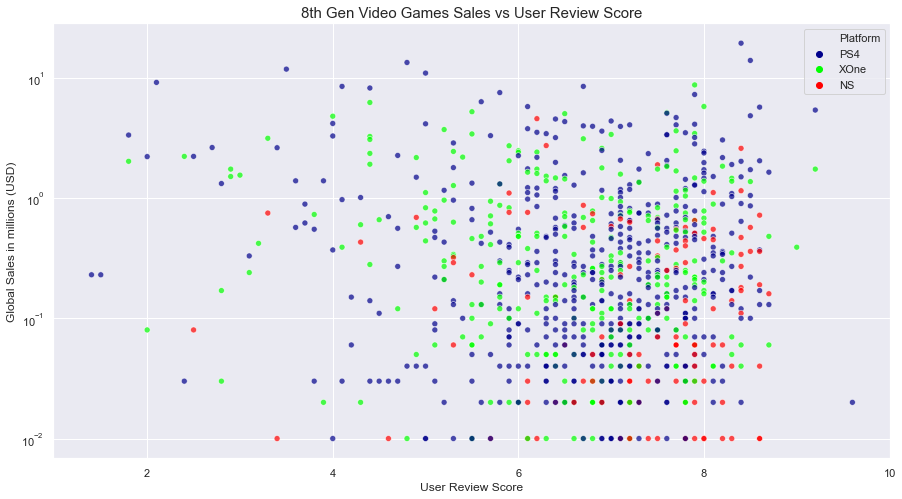

In [61]:
# Visualize Sales vs User Review
color = {'PS4':'darkblue','XOne':'lime','NS':'red'}
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.scatterplot(x='user_review',y='Global_Sales',data=console_score_merge,hue='Platform',palette=color,alpha=0.7)
g.set_yscale('log')
plt.xlabel('User Review Score')
plt.ylabel('Global Sales in millions (USD)')
plt.title('8th Gen Video Games Sales vs User Review Score',fontsize=15)
plt.show()

The data points is very scattered.

Next I will explore categorical variable that is Platform.

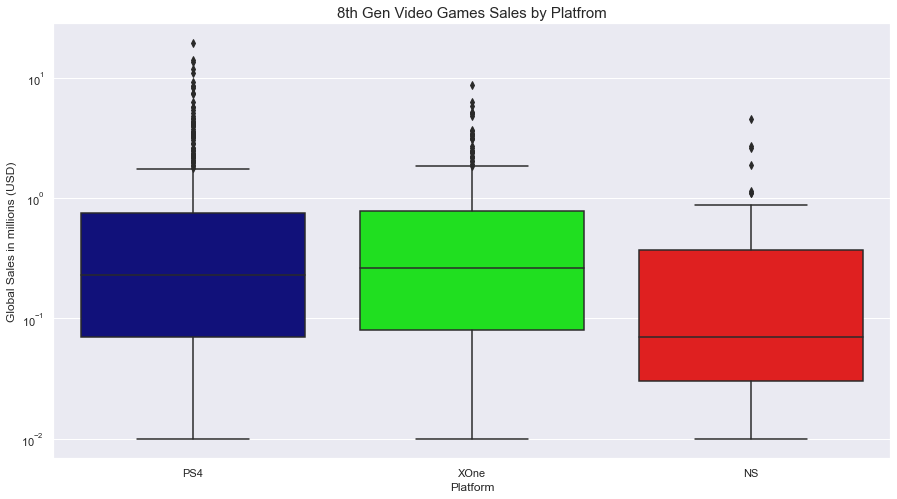

In [62]:
# Visualize Sales vs Platform
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.boxplot(data=console_score_merge,x='Platform',y='Global_Sales',palette=color)
g.set_yscale('log')
plt.xlabel('Platform')
plt.ylabel('Global Sales in millions (USD)')
plt.title('8th Gen Video Games Sales by Platfrom',fontsize=15)
plt.show()

From the figure, we can see that sales of PS4 and Xbox One is not very different, but for Nintendo Switch it's apparently lower. So, platform might really have an impact on sales.

Last, I will explore sales vs. game genre.

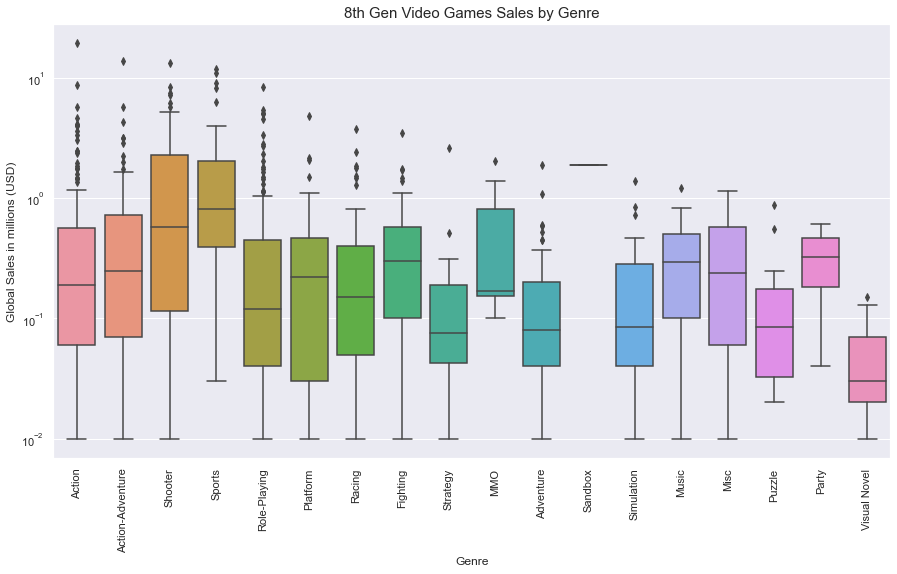

In [63]:
# Visualize Sales vs Genre
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.boxplot(data=console_score_merge,x='Genre',y='Global_Sales')
g.set_yscale('log')
plt.xlabel('Genre')
plt.ylabel('Global Sales in millions (USD)')
plt.title('8th Gen Video Games Sales by Genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### 8. Adding 'game age' feature

Before I move on to training the model, I will add one more feature which is 'game age'. It is the number of years that the game has been released.

The sales data I imported is as of 2019, so I will calculate the time from game released to 2019.

In [64]:
# Add 'game_age' feature

console_score_merge['game_age'] = console_score_merge['Year'].apply(lambda x: 2020 - x + 1)

console_score_merge.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,meta_score,user_review,game_age
count,913.000000,189.000000,24.000000,0.0,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,910.000000,913.000000
mean,8928.420591,7.807407,8.400000,NaN,0.753998,0.327032,0.295652,0.032289,0.098894,2016.630887,7.408872,6.745275,4.369113
std,6018.078281,1.078241,1.083874,NaN,1.570650,0.624963,0.803217,0.112366,0.231903,1.398076,0.987520,1.282417,1.398076
min,21.000000,4.000000,6.000000,NaN,0.010000,0.000000,0.000000,0.000000,0.000000,2013.000000,2.300000,1.400000,1.000000
25%,3405.000000,7.300000,7.875000,NaN,0.060000,0.030000,0.000000,0.000000,0.010000,2016.000000,6.800000,6.100000,3.000000
50%,8368.000000,8.000000,8.750000,NaN,0.220000,0.100000,0.060000,0.000000,0.020000,2017.000000,7.500000,7.000000,4.000000
75%,14430.000000,8.500000,9.100000,NaN,0.690000,0.320000,0.250000,0.030000,0.090000,2018.000000,8.100000,7.700000,5.000000
max,19846.000000,10.000000,10.000000,NaN,19.390000,6.060000,9.710000,2.170000,3.020000,2020.000000,9.700000,9.600000,8.000000


#### 9. Building a model

In the final step, I will build a regression model to forecast games sales. The feature that I choose are 'Genre','Platform','meta_score','game_age','Global_Sales'.

I will scale numeric features then split the sample into test and train set.

In [65]:
# Import sklearn 
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

sample = console_score_merge.reindex(['Genre','Platform','meta_score','game_age','Global_Sales'],axis=1)
feature = pd.get_dummies(sample.iloc[:,:-1])

sc = MinMaxScaler()
feature[['meta_score','game_age']] = sc.fit_transform(feature[['meta_score','game_age']].values)

X = feature.values
y = sample['Global_Sales'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

For the baseline MAE, I will assume that it's from simple regression between sales and Metacritics score because this method is possible to be executed by human.

In [66]:
# Find baseline MAE

log_reg = np.polyfit(np.log(X_test[:,0]),y_test,1)

a = log_reg[0]
b = log_reg[1]

y_pred = a*np.log(X_test[:,0])+b

baseline_mae = mean_absolute_error(y_test,y_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Baseline MAE on test set = {:.04f}'.format(baseline_mae))
print('Baseline RMSE on test set = {:.04f}'.format(baseline_rmse))

Baseline MAE on test set = 0.7766
Baseline RMSE on test set = 1.4015


Next, I will fit the training set to various algorithm to see which one give us the least error.

Then I will continue to tune hyperparameter on that algorithm. 

In [67]:
# Create fit and evaluate and append function 

def fit_evaluate_append(model):
        
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    y_pred = model.predict(X_test)
    model_mae = mean_absolute_error(y_test, y_pred)
    model_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    model_r2 = r2_score(y_test,y_pred)

    initial_mae.append(round(model_mae,4))
    initial_rmse.append(round(model_rmse,4))
    
    return initial_mae,initial_rmse  


<ipython-input-67-b63d72a6d486>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Algorithm,MAE,RMSE
0,Ridge,0.7798,1.3208
1,DecisionTree,0.8587,1.8127
2,RandomForest,0.6884,1.4515
3,GradientBoosting,0.6520,1.3387


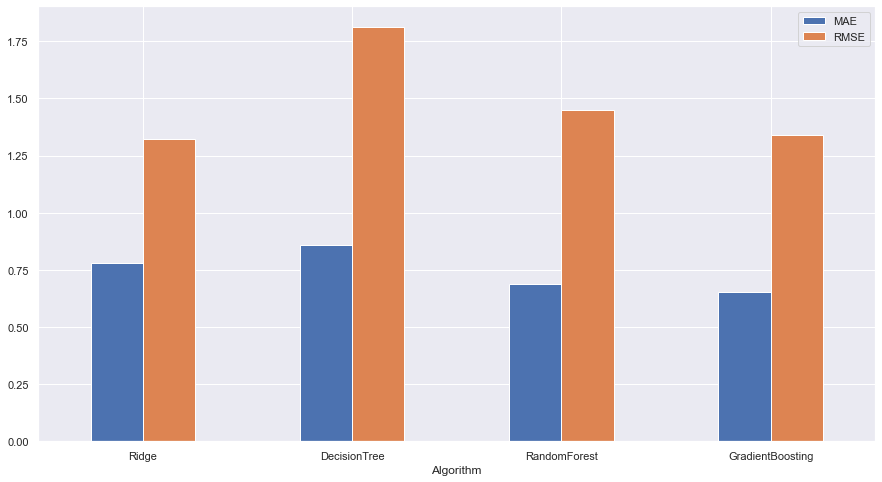

In [68]:
# Evaluate all baseline model
initial_mae = []
initial_rmse = []

ridge = Ridge()
fit_evaluate_append(ridge)

dt = DecisionTreeRegressor()
fit_evaluate_append(dt)

rf = RandomForestRegressor()
fit_evaluate_append(rf)

gbr = GradientBoostingRegressor()
fit_evaluate_append(gbr)

base_score = pd.DataFrame({'Algorithm':['Ridge','DecisionTree','RandomForest','GradientBoosting'],'MAE':initial_mae,'RMSE':initial_rmse})

display(base_score)

fig, ax = plt.subplots()
base_score.plot.bar(x='Algorithm', ax=ax)
plt.xticks(rotation=0)
plt.show()

The results show that simple Gradient Boosting algorithm gave us the least error. Thus, I will fine-tune the hyperparameters using GridSearchCV.

In [77]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate':np.arange(0.1,1,0.1),'n_estimators':[30,50,100,150],\
'min_samples_leaf':np.arange(1,6),'max_depth':np.arange(1,8),'min_samples_split':np.arange(1,6),'max_features':["auto", "sqrt", "log2", None],'loss':['lad']}
grid = GridSearchCV(estimator=gbr,param_grid=params,n_jobs=-1,cv=4)
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['lad'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([1, 2, 3, 4, 5]),
                         'n_estimators': [30, 50, 100, 150]})

In [78]:
print(grid.best_score_)
print(grid.best_params_)

0.369837293103752
{'learning_rate': 0.9, 'loss': 'lad', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


In [79]:
model = grid.best_estimator_

y_pred = model.predict(X_test)
print('Best model MAE = {:.04f}'.format(mean_absolute_error(y_test,y_pred)))
print('Best model RMSE = {:.04f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Best model MAE = 0.5667
Best model RMSE = 1.3158


After tuning the model, we get the best model with decreased 27% MAE from baseline!

However, there are ways to further decrease the error such as follows.

1. Removing outliers. However, this will result in model predicting a norrower range of sales.
2. Feature engineering. Applying domain knowledge or statistical knowledge into adding more features e.g. class of game publishers or game developers may help improve the model.
3. Consider widening your scope, train using more data / collect more data.